#GATHERING THE DATA

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer, make_column_selector as selector
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import accuracy_score,multilabel_confusion_matrix,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv("../data/creditcard.csv")
df


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


#EXPLORATORY DATA ANALYSIS

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
df.shape

(284807, 31)

In [8]:
df.duplicated().sum()

1081

In [9]:
df = df.drop_duplicates()

In [10]:
df.duplicated().sum()

0

#SUMMARY STATISTICS & FEATURE ENGINEERING

In [11]:
print(df['Class'].value_counts(normalize=True))

Class
0    0.998333
1    0.001667
Name: proportion, dtype: float64


In [12]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
IQR = q3 - q1
outliers = ((df < (q1 - 1.5 * IQR)) | (df > (q3 + 1.5 * IQR)))
outliers_count = outliers.sum()
print(outliers_count)

Time          0
V1         6948
V2        13390
V3         3306
V4        11094
V5        12221
V6        22886
V7         8839
V8        23904
V9         8199
V10        9345
V11         735
V12       15282
V13        3362
V14       14060
V15        2884
V16        8180
V17        7353
V18        7468
V19       10150
V20       27553
V21       14401
V22        1298
V23       18467
V24        4758
V25        5333
V26        5665
V27       38799
V28       30094
Amount    31685
Class       473
dtype: int64


#VISUALIZATION PHASE

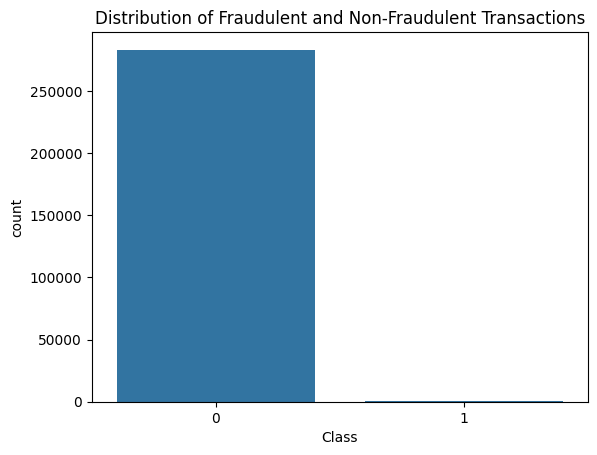

In [13]:
sns.countplot(x='Class', data=df)
plt.title('Distribution of Fraudulent and Non-Fraudulent Transactions')
plt.show()

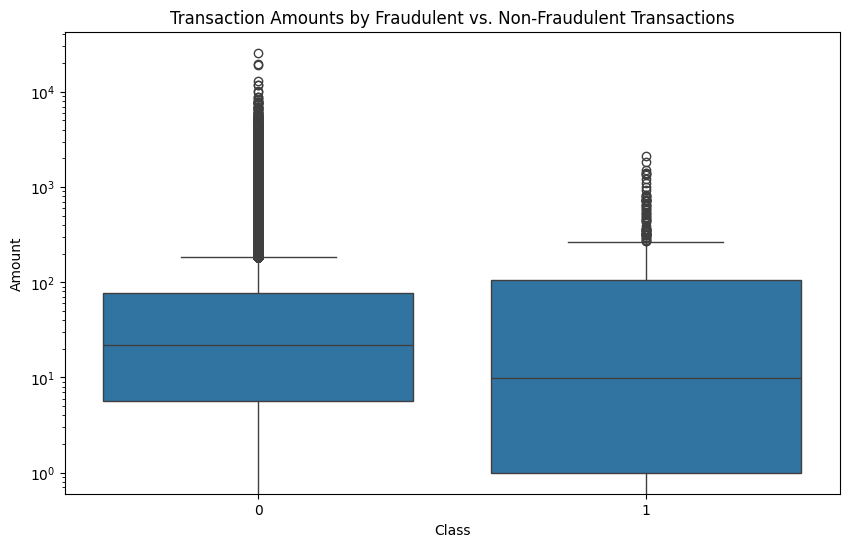

In [14]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Transaction Amounts by Fraudulent vs. Non-Fraudulent Transactions')
plt.yscale('log') 
plt.show()

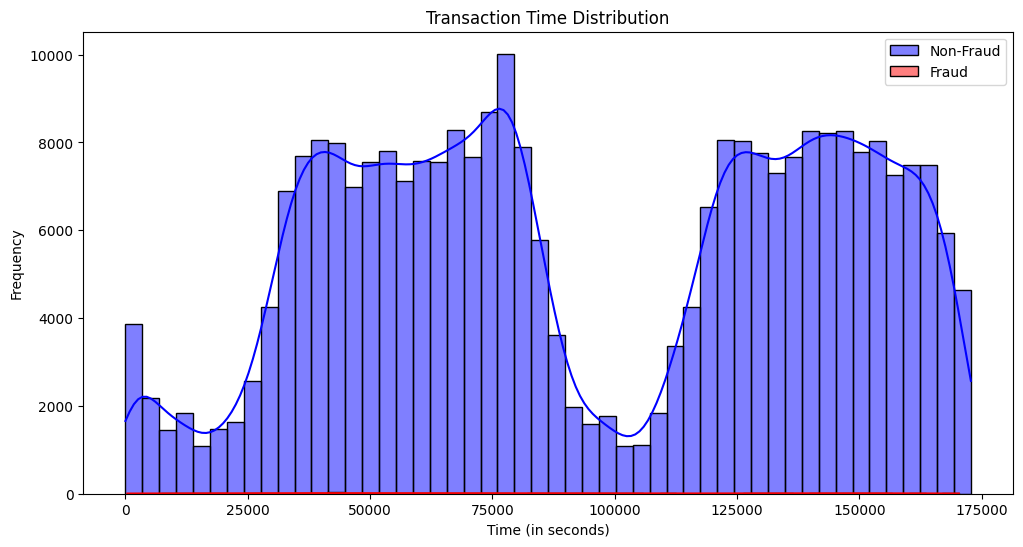

In [15]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Class'] == 0]['Time'], bins=50, color='blue', alpha=0.5, kde=True, label='Non-Fraud')
sns.histplot(df[df['Class'] == 1]['Time'], bins=50, color='red', alpha=0.5, kde=True, label='Fraud')
plt.legend()
plt.title('Transaction Time Distribution')
plt.xlabel('Time (in seconds)')
plt.ylabel('Frequency')
plt.show()

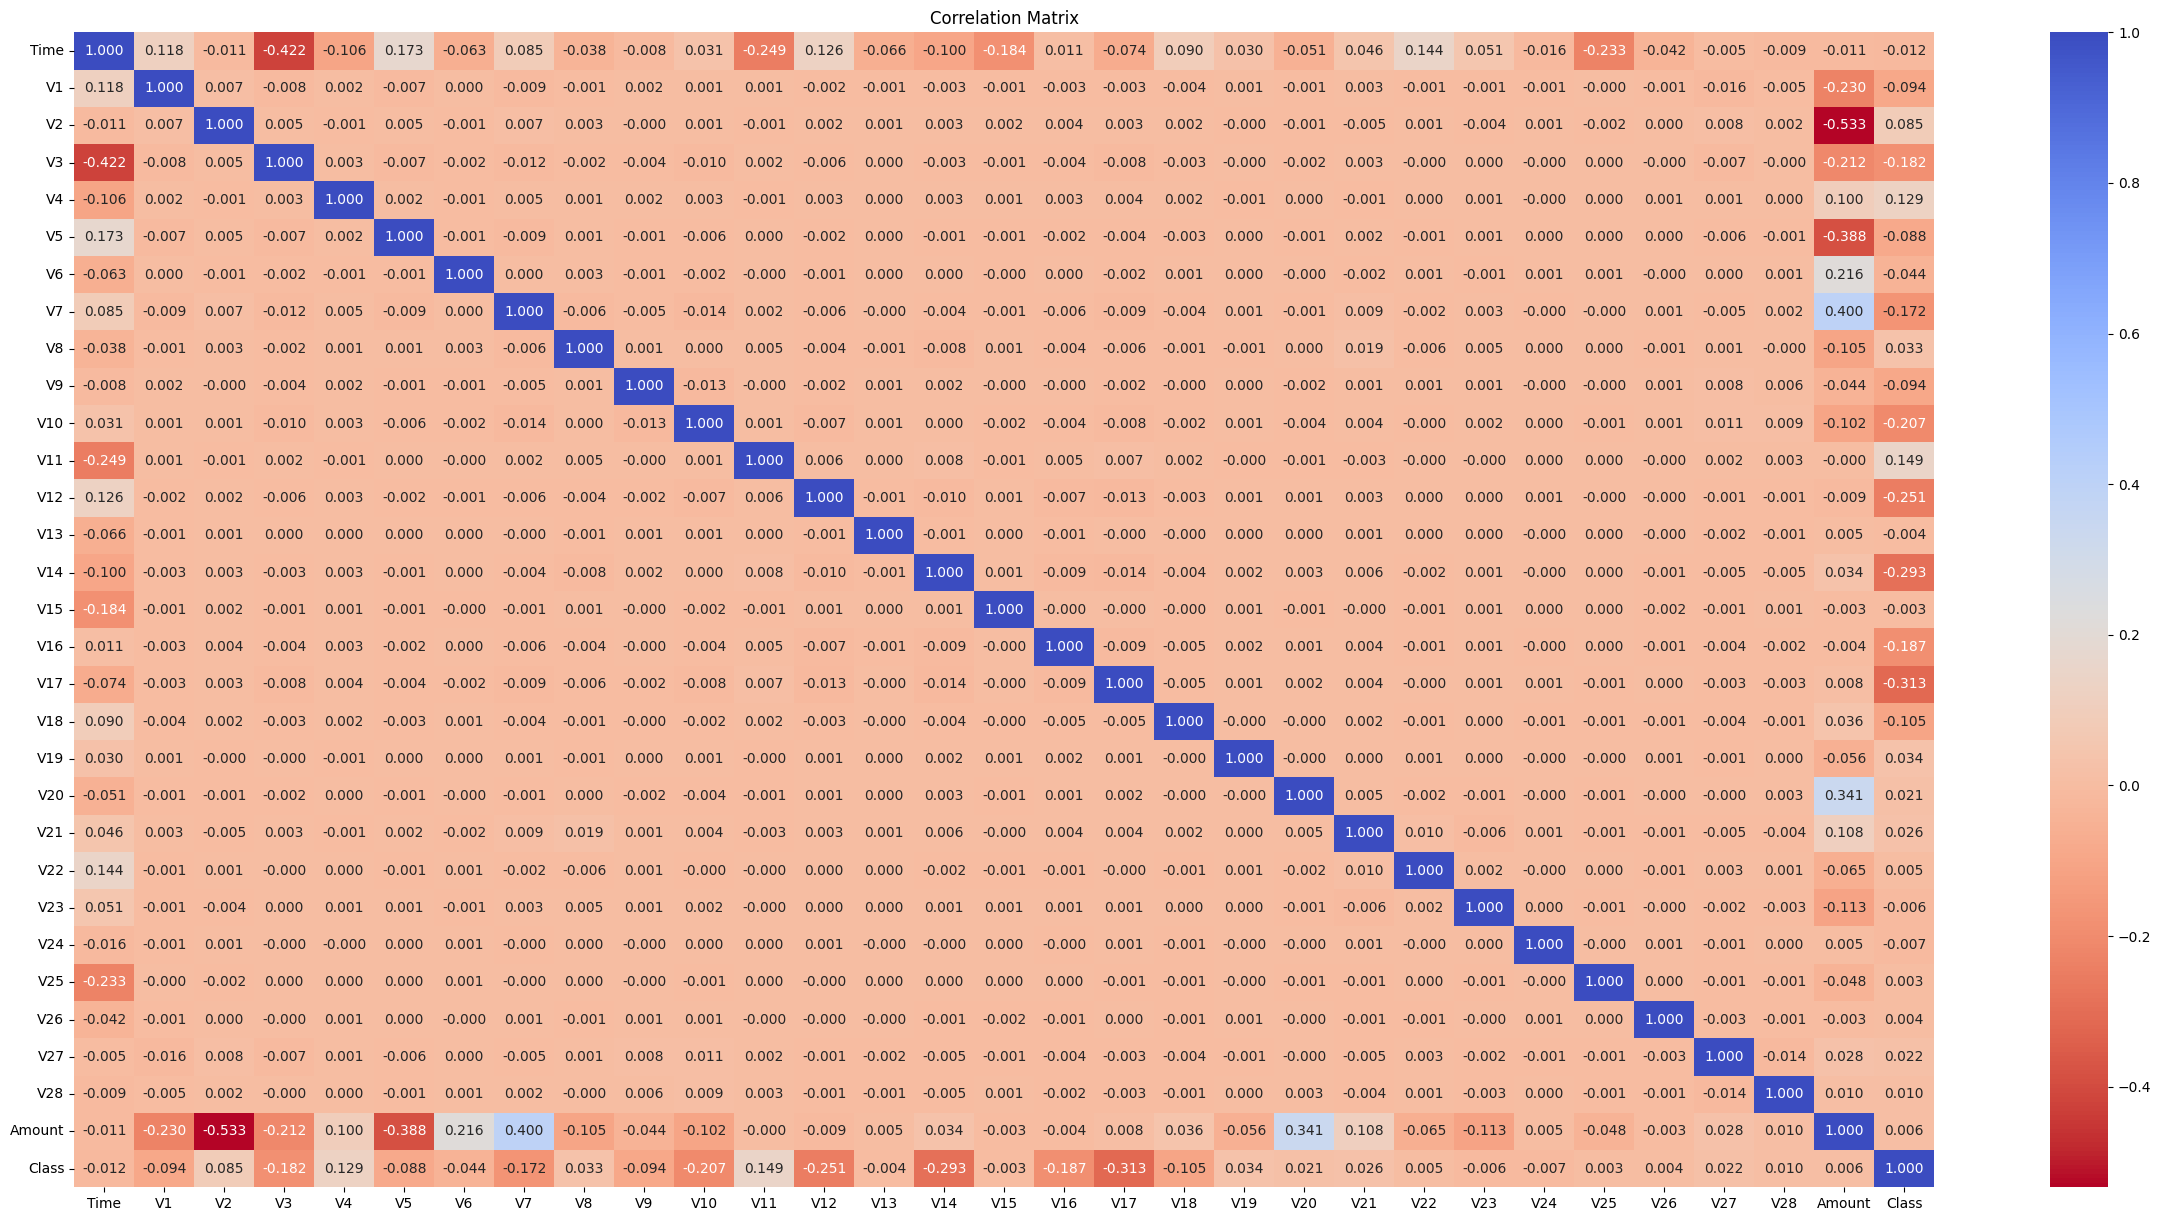

In [16]:
corr = df.corr()
plt.figure(figsize=(30,15))
sns.heatmap(corr, cmap='coolwarm_r', annot = True, fmt=".3f")
plt.title("Correlation Matrix")
plt.show()

#HANDLING CLASS IMBALANCES USING OVERSAMPLING TECHNIQUE

In [17]:
X = df.drop('Class', axis=1)
y = df['Class']

In [18]:
scaler = StandardScaler()
X['NormalizedAmount'] = scaler.fit_transform(X['Amount'].values.reshape(-1, 1))
X['NormalizedTime'] = scaler.fit_transform(X['Time'].values.reshape(-1, 1))

X = X.drop(['Time', 'Amount'], axis=1)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [20]:
!pip install imbalanced-learn

In [21]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f"Original class distribution: {Counter(y_train)}")
print(f"New class distribution after SMOTE: {Counter(y_train_smote)}")

Original class distribution: Counter({0: 226602, 1: 378})
New class distribution after SMOTE: Counter({0: 226602, 1: 226602})


#MODEL TRAINING AND BUILDING

In [22]:
def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Use seaborn to visualize the confusion matrix
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

##LOGISTIC REGRESSION

###TRAINING

In [23]:
from sklearn.metrics import roc_auc_score

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_smote, y_train_smote)

LogisticRegression(max_iter=1000)

###TESTING

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56651
           1       0.05      0.87      0.10        95

    accuracy                           0.97     56746
   macro avg       0.53      0.92      0.54     56746
weighted avg       1.00      0.97      0.99     56746



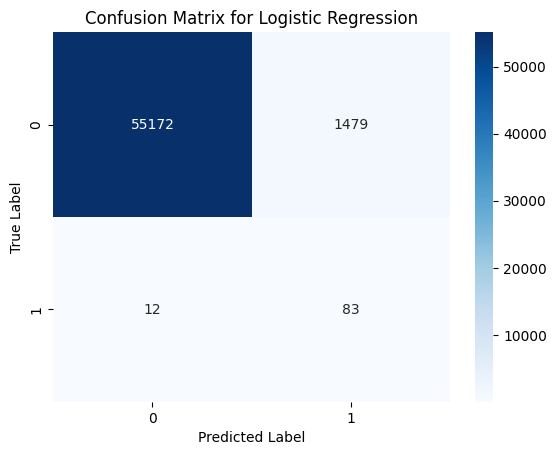

ROC AUC score: 0.9618504434817429


In [24]:
y_pred_log_reg = log_reg.predict(X_test)

print(classification_report(y_test, y_pred_log_reg))
plot_confusion_matrix(y_test, y_pred_log_reg, title='Confusion Matrix for Logistic Regression')
print("ROC AUC score:", roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1]))

##RANDOM FOREST CLASSIFIER

###TRAINING

In [25]:
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train_smote, y_train_smote)

RandomForestClassifier()

###TESTING

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.93      0.75      0.83        95

    accuracy                           1.00     56746
   macro avg       0.97      0.87      0.92     56746
weighted avg       1.00      1.00      1.00     56746



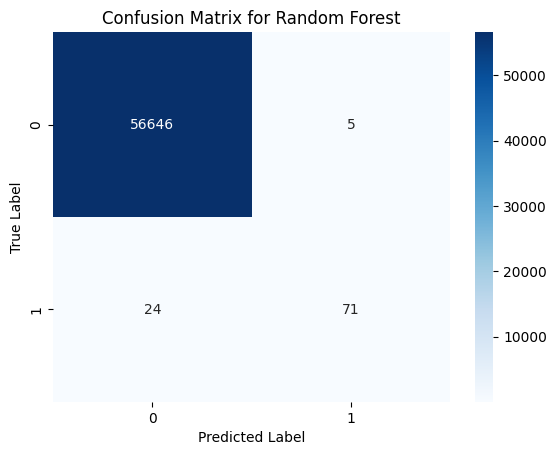

ROC AUC score: 0.9591127206376252


In [26]:
y_pred_rf = rf_clf.predict(X_test)

print(classification_report(y_test, y_pred_rf))
plot_confusion_matrix(y_test, y_pred_rf, title='Confusion Matrix for Random Forest')
print("ROC AUC score:", roc_auc_score(y_test, rf_clf.predict_proba(X_test)[:, 1]))